# 02 - EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("../data/cleaned_data.csv")

df.head()


,Previous_Score,Hours_Studied,Attendance,Assignments_Completed,Sleep_Hours,Participation,Final_Score,Pass_Fail
0,69.9,1.83,82.6,7,6.0,0,70.6,1
1,50.9,2.55,36.8,4,5.9,0,40.1,1
2,74.4,2.09,60.1,8,9.1,2,58.9,1
3,100.0,2.68,64.4,4,9.8,2,74.9,1
4,48.0,3.18,65.2,8,5.6,2,46.0,1


In [2]:
df.describe()


,Previous_Score,Hours_Studied,Attendance,Assignments_Completed,Sleep_Hours,Participation,Final_Score,Pass_Fail
count,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,54.426450,3.493433,65.34045,5.981333,6.974283,1.200667,53.425017,0.775500
std,27.252908,1.488955,14.91847,2.892585,1.458349,0.870743,16.601519,0.417287
min,0.000000,0.000000,10.50000,0.000000,1.800000,0.000000,0.600000,0.000000
25%,35.075000,2.480000,55.10000,4.000000,6.000000,0.000000,41.300000,1.000000
50%,55.050000,3.470000,65.50000,6.000000,7.000000,1.000000,53.400000,1.000000
75%,74.700000,4.502500,75.60000,8.000000,8.000000,2.000000,65.600000,1.000000
max,100.000000,8.790000,100.00000,12.000000,10.000000,2.000000,100.000000,1.000000


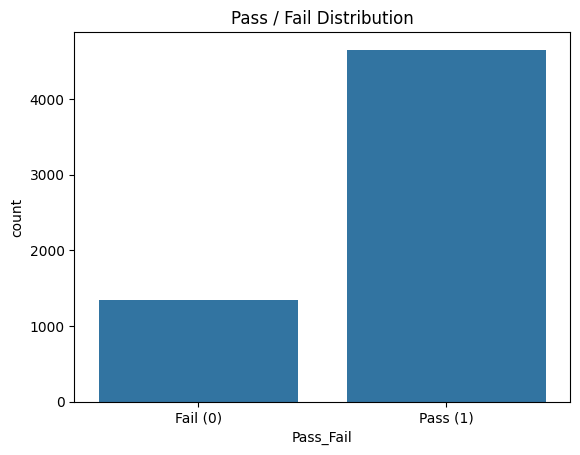

Pass_Fail
1    77.55%
0    22.45%
Name: proportion, dtype: object

In [3]:
sns.countplot(x="Pass_Fail", data=df)
plt.title("Pass / Fail Distribution")
plt.xticks([0,1], ["Fail (0)", "Pass (1)"])
plt.show()

df["Pass_Fail"].value_counts(normalize=True).map(lambda x: f"{x:.2%}")


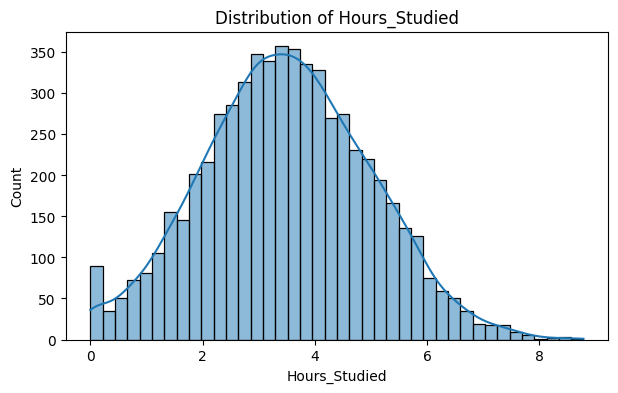

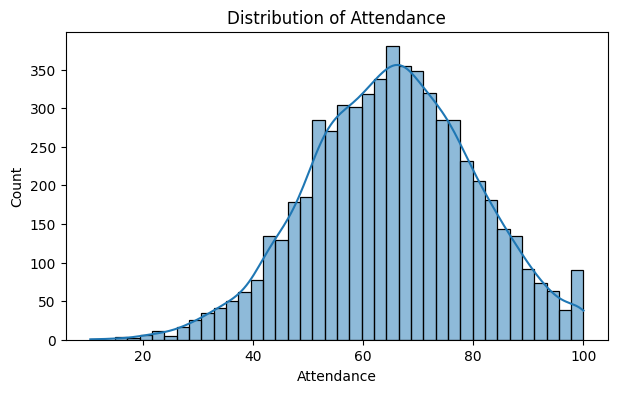

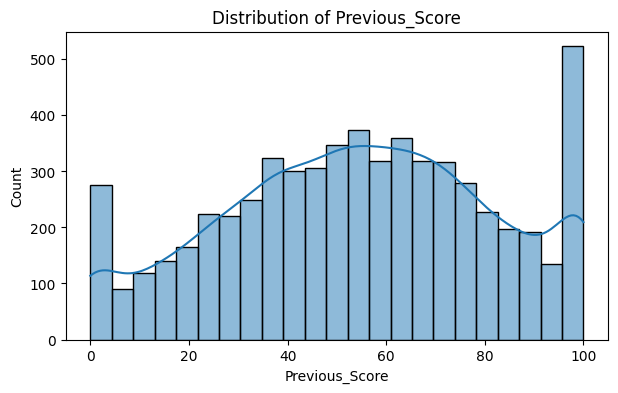

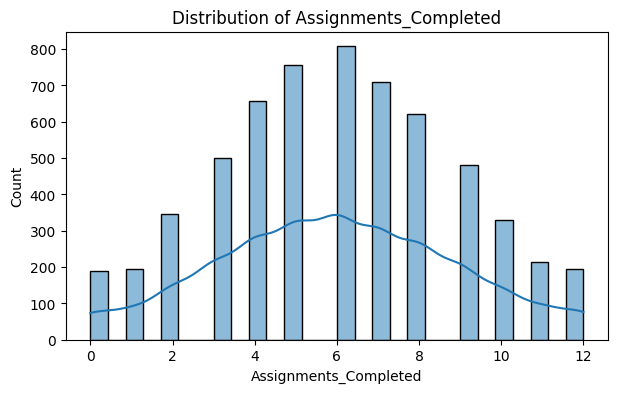

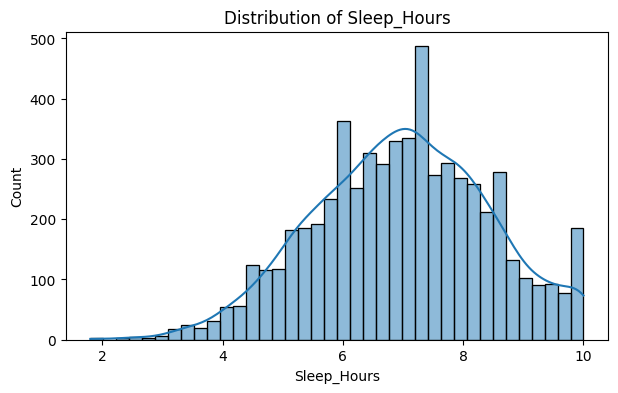

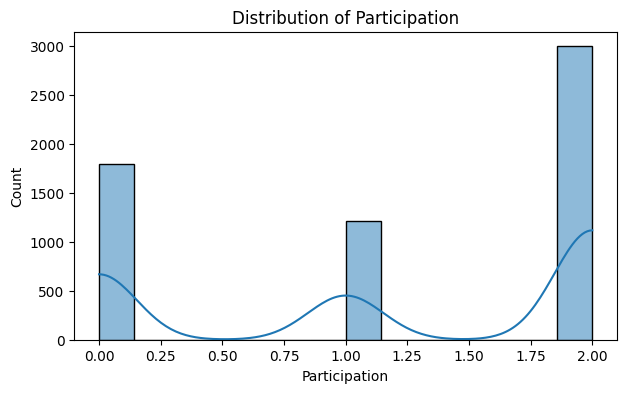

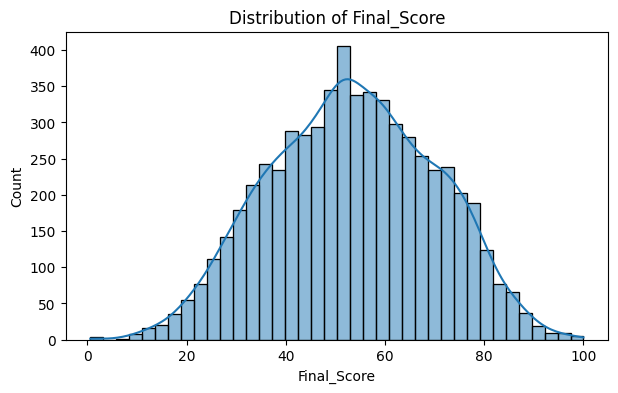

In [4]:
num_cols = ['Hours_Studied', 'Attendance', 'Previous_Score', 
            'Assignments_Completed', 'Sleep_Hours', 'Participation', 'Final_Score']

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


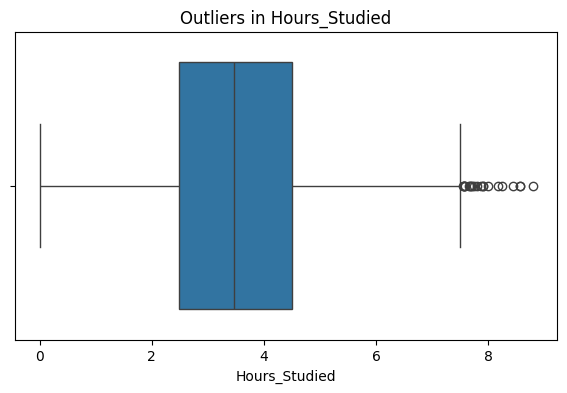

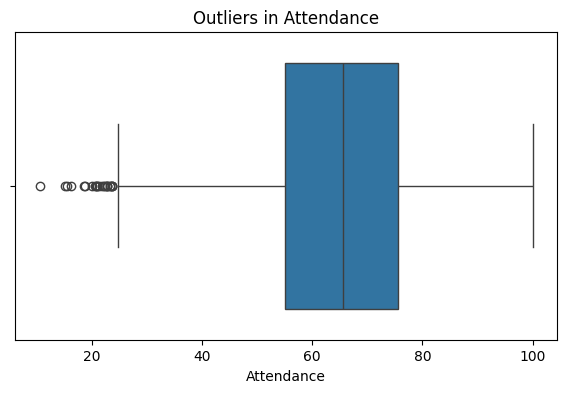

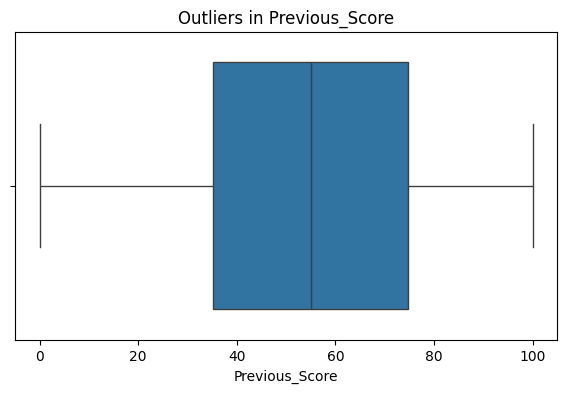

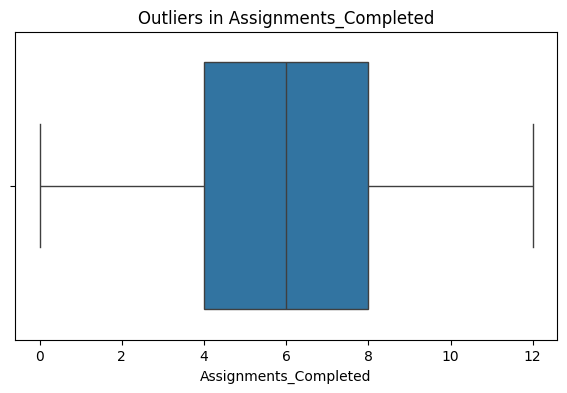

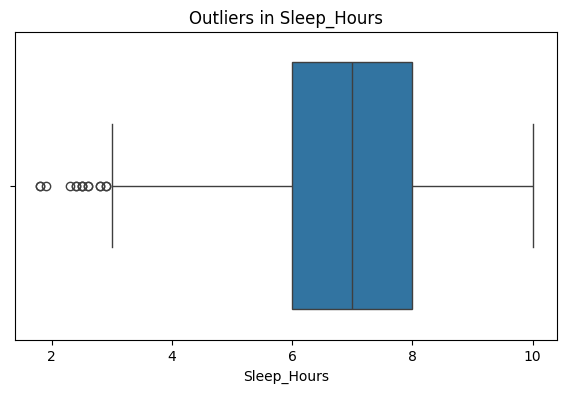

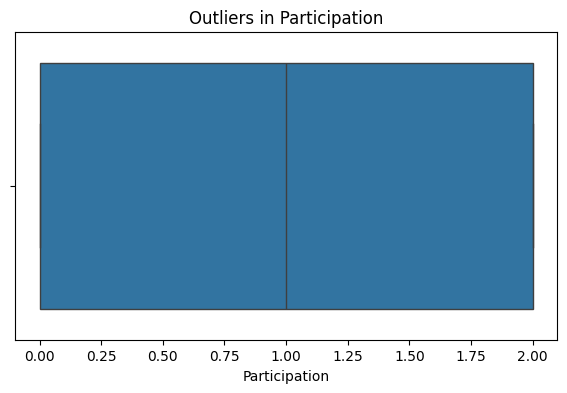

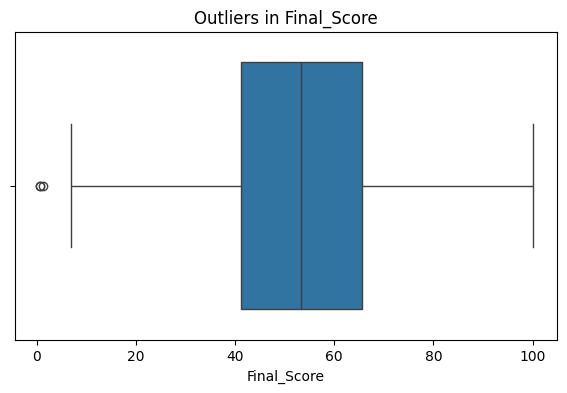

In [5]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


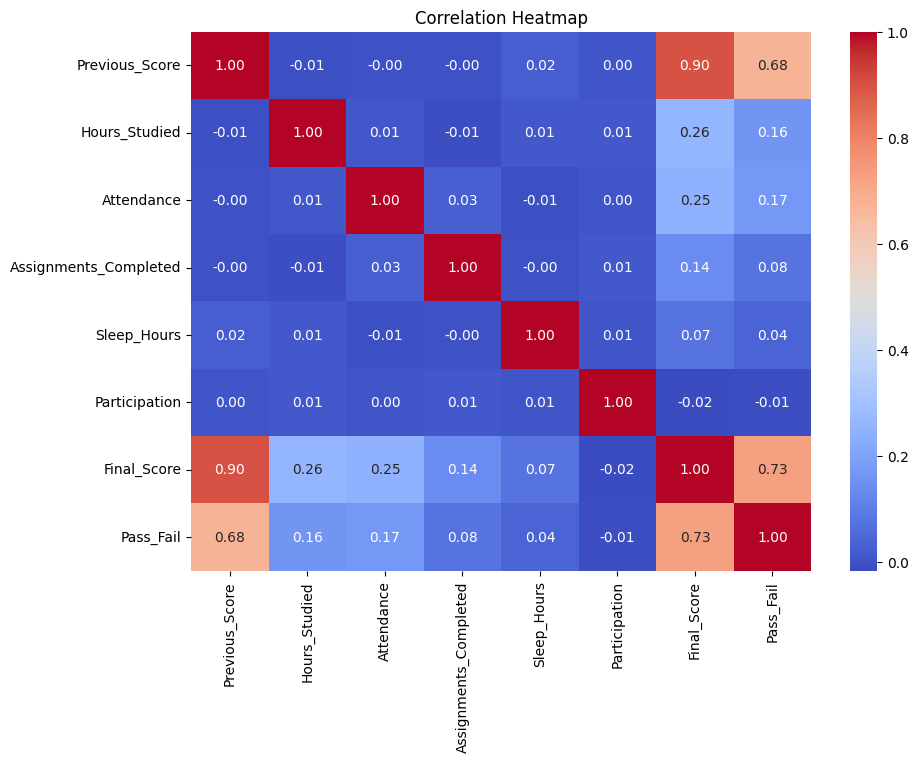

In [6]:



plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


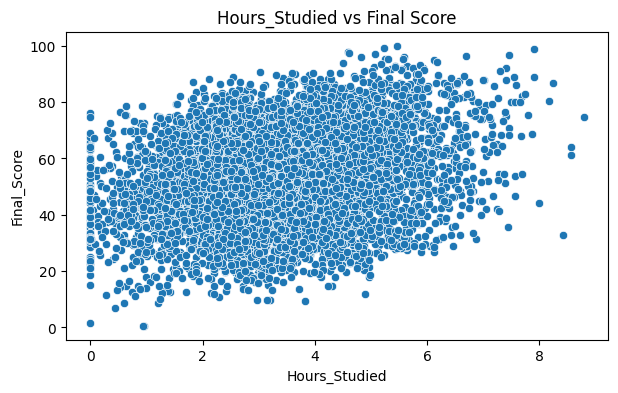

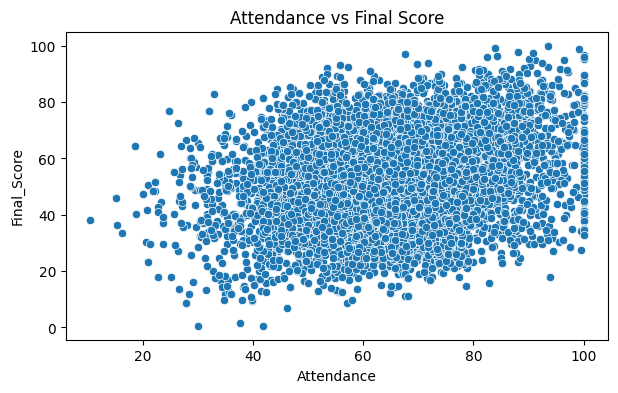

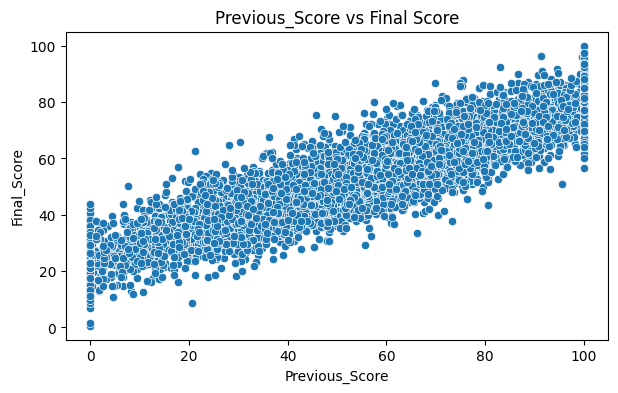

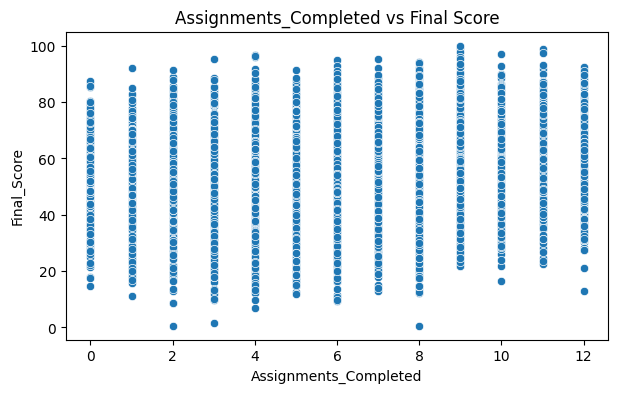

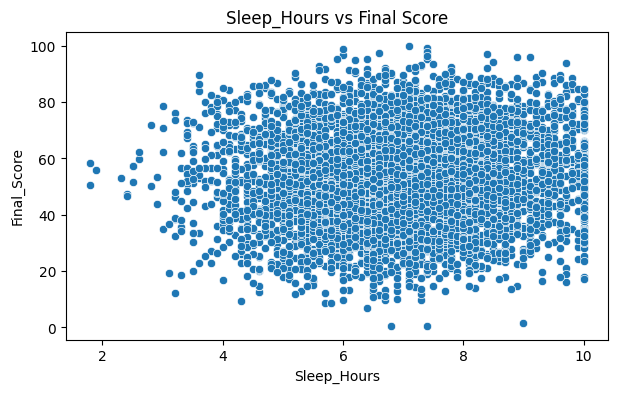

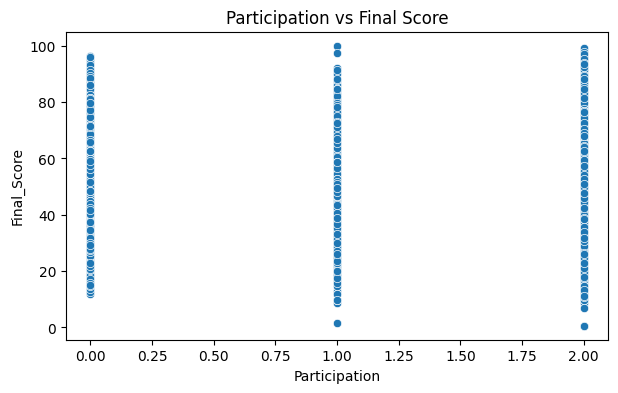

In [7]:
for col in num_cols:
    if col != "Final_Score":
        plt.figure(figsize=(7,4))
        sns.scatterplot(x=df[col], y=df["Final_Score"])
        plt.title(f"{col} vs Final Score")
        plt.show()


In [8]:
df.groupby("Pass_Fail").mean()


,Previous_Score,Hours_Studied,Attendance,Assignments_Completed,Sleep_Hours,Participation,Final_Score
Pass_Fail,,,,,,,
0,20.107647,3.047617,60.700817,5.567186,6.866592,1.220490,30.931626
1,64.361423,3.622493,66.683580,6.101225,7.005459,1.194928,59.936643


In [9]:
import os

os.makedirs("../reports/figs", exist_ok=True)

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.savefig("../reports/figs/correlation_matrix.png", bbox_inches='tight')
plt.close()
